# Download the Dataset

This project uses the London Bike Sharing dataset, which contains daily bike rental counts alongside weather and temporal variables. The dataset was selected because it allows analysis of demand patterns over time and examination of how external factors such as temperature, seasonality, and calendar effects influence bike usage.

In [63]:
# Installing required packages (uncomment and run once if not installed)
# %pip install kagglehub
# %pip install pandas
# %pip install openpyxl
# %pip install ipywidgets

In [64]:
# Importing necessary libraries
import pandas as pd       # parse CSV data / explore data
import kagglehub          # download dataset CSVs
import os                 # create CSV paths and handle filesystem

In [65]:
# Download latest version
path = kagglehub.dataset_download("hmavrodiev/london-bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\m\.cache\kagglehub\datasets\hmavrodiev\london-bike-sharing-dataset\versions\1


In [66]:
# Get the CSV filename : full path(s) from KaggleHub dataset folder path
def find_csv_files(path):
    csv_paths = {}

    for root, _, files in os.walk(path):
        for f in files:
            if f.lower().endswith(".csv"):
                if f not in csv_paths:
                    csv_paths[f] = []
                csv_paths[f].append(os.path.join(root, f))

    if not csv_paths:
        raise FileNotFoundError(f"No .csv files found in dataset")

    return csv_paths

csv_paths = find_csv_files(path)
print(csv_paths)

{'london_merged.csv': ['C:\\Users\\m\\.cache\\kagglehub\\datasets\\hmavrodiev\\london-bike-sharing-dataset\\versions\\1\\london_merged.csv']}


# Exploring the Datset

The goal of this exploration is to:
- Understand the structure of the dataset
- Identify relevant features for later analysis
- Check for missing values or inconsistencies
- Add and expand on temporal variables in the dataset

This step informs which variables are retained for downstream analysis and visualization.

In [67]:
# Read in CSV file as pandas dataframe
bikes = pd.read_csv(csv_paths['london_merged.csv'][0])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [68]:
# Show dataset
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [69]:
# count the unique values in the weather_code column
bikes.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [70]:
# count the unique values in the season column
bikes.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [71]:
# Renaming the columns
new_cols_dict = {
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [72]:
# Making humidity percent
bikes['humidity_percent'] = bikes['humidity'] / 100

In [73]:
# creating a season dictionary to map the integers to seasons
season_dict = {
    '0.0':'Spring',
    '1.0':'Summer',
    '2.0':'Autumn',
    '3.0':'Winter'
}

# creating a weather dictionary to map the weather_code to weather states
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# changing the seasons column data type to string
bikes.season = bikes.season.astype('str')
# mapping the values 0-3 to the actual written seasons
bikes.season = bikes.season.map(season_dict)

# changing the weather column data type to string
bikes.weather = bikes.weather.astype('str')
# mapping the values to the actual written weathers
bikes.weather = bikes.weather.map(weather_dict)

In [74]:
# convert to datetime (do this ONCE)
bikes['time'] = pd.to_datetime(bikes['time'])

# time-based features
bikes['year'] = bikes['time'].dt.year
bikes['month'] = bikes['time'].dt.month
bikes['month_name'] = bikes['time'].dt.month_name()

bikes['day'] = bikes['time'].dt.day
bikes['dayofweek'] = bikes['time'].dt.dayofweek      # 0=Mon, 6=Sun
bikes['day_name'] = bikes['time'].dt.day_name()

bikes['hour'] = bikes['time'].dt.hour

In [75]:
# checking our dataframe to see the additions to table
bikes

,time,count,temp_real_C,temp_feels_like_C,humidity,wind_speed_kph,weather,is_holiday,is_weekend,season,humidity_percent,year,month,month_name,day,dayofweek,day_name,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,Winter,0.930,2015,1,January,4,6,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,Winter,0.930,2015,1,January,4,6,Sunday,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,Winter,0.965,2015,1,January,4,6,Sunday,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,Winter,1.000,2015,1,January,4,6,Sunday,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,Winter,0.930,2015,1,January,4,6,Sunday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,Broken clouds,0.0,0.0,Winter,0.810,2017,1,January,3,1,Tuesday,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,Cloudy,0.0,0.0,Winter,0.810,2017,1,January,3,1,Tuesday,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,Cloudy,0.0,0.0,Winter,0.785,2017,1,January,3,1,Tuesday,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,Cloudy,0.0,0.0,Winter,0.760,2017,1,January,3,1,Tuesday,22


## Feature Selection Rationale

The analysis focuses on the following categories of variables:

- **Temporal features** (year, month, weekday): to capture seasonality and long-term trends
- **Weather features** (temperature, feels-like temperature): to evaluate environmental impact on demand
- **Target variable** (bike rental count): represents overall system usage

Variables not directly related to usage patterns or decision-making were excluded to keep the analysis focused and interpretable.

# Data Visualization

Visualizations are used to identify trends, seasonality, and relationships that are not immediately apparent from summary statistics. Each chart is designed to answer a specific analytical question related to bike usage behavior.

In [76]:
# Installing required packages (uncomment and run once if not installed)
# %pip install matplotlib
# %pip install seaborn

In [77]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

In [78]:
sns.set_theme(style="whitegrid")

## Temporal Analysis
How is bike usage affected by time related variables like year, month, week, etc. Do bike share users tend to rent more on certain times over others?

!!!!!
Average counts are sometimes chosen to be visualized total counts to show preferences across temporal factors, where some factors can be disporptionaely represented (ex: are weekdays prefered over weekends or do weekdays just occur more. Average counts also give a better scale. 

### Bike Shares by Year

C:\Users\m\AppData\Local\Temp\ipykernel_20348\2580853065.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(title="Season")


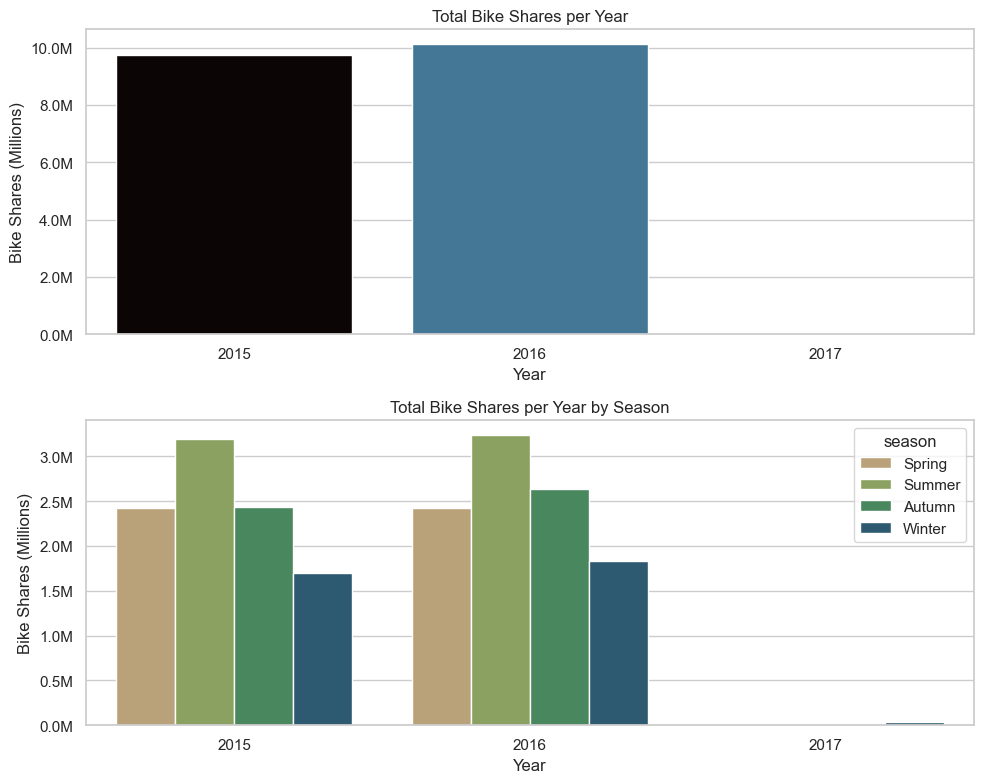

In [79]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))

# 1) Total Bike Shares per Year
axes[0].set_title("Total Bike Shares per Year")

sns.barplot(
    data=bikes,
    x='year',
    y='count',
    estimator='sum',
    palette='mako',
    hue='year',
    errorbar=None,
    legend=None,
    ax=axes[0]
)

# 2) Total Bike Shares per Year by Season
axes[1].set_title("Total Bike Shares per Year by Season")
axes[1].legend(title="Season")

season_order = ["Spring", "Summer", "Autumn", "Winter"]

sns.barplot(
    data=bikes,
    x='year',
    y='count',
    estimator='sum',
    palette='gist_earth_r',
    hue='season',
    hue_order=season_order,
    errorbar=None,
    ax=axes[1]
)

for ax in axes:
    ax.set_xlabel("Year")
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')) # format to millions
    ax.set_ylabel("Bike Shares (Millions)")

plt.tight_layout()
plt.show()

- Data for 2017 seems to be incomplete, only capturing some of the first season of the year, Winter.
- The total bike shares per year bar plot shows 2016 is the highest volume year. I also chose to show the seasons per year, which the volume of the seasons is mostly the same across years 2015 and 2016.

### Bike Shares by Seasons

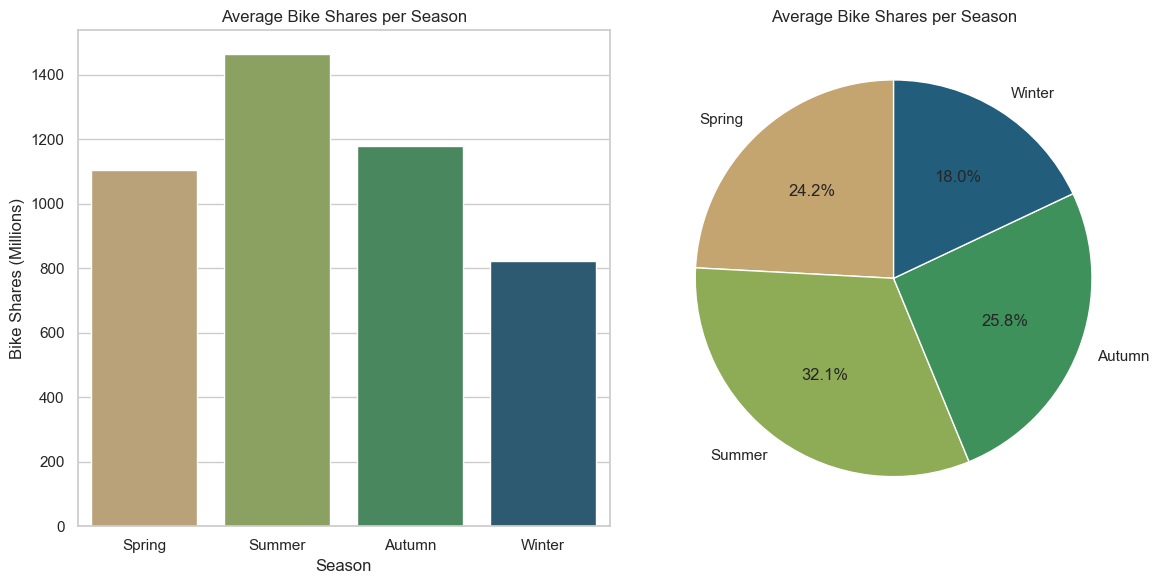

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
season_order = ["Spring", "Summer", "Autumn", "Winter"]

palette = sns.color_palette('gist_earth_r', len(season_order))

# 1) Average Bike Shares Per Season (Bar Chart)
sns.barplot(
    data=bikes,
    x='season',
    y='count',
    estimator='mean',
    order=season_order,
    hue='season',
    hue_order=season_order,
    palette=palette,
    errorbar=None,
    ax=axes[0]
)

axes[0].set_title("Average Bike Shares per Season")
axes[0].set_xlabel("Season")
axes[0].set_ylabel("Bike Shares (Millions)")



# 2) Total Bike Shares Per Season (Pie Chart)
season_totals = (bikes.groupby('season')['count'].mean().reindex(season_order))

axes[1].pie(
    season_totals.values,
    labels=season_totals.index,
    autopct='%1.1f%%',
    startangle=90,
    colors = palette
)

axes[1].set_title("Average Bike Shares per Season")

plt.tight_layout()
plt.show()

This visualization of Average Bike Shares per Season more clearly shows the differences between the season contribution to the volume of bike shares by aggregating data from all years. The bar chart shows the number, while the pie chart shows the percentage of bike shares. In order from greatest to least contribution: Summer at 32.1%, Autumn at 25.8%, Spring at 24.2%, Winter at 18.0%.

For months, day of month, weekday, and hourly I include bar plots and line plots to show both the volume in each category with the bar plot, and also the relationship / range with the line plot. The line plot makes connections and also has a more flexible range (not forced to start at 0), which can show greater differences between the volume across time. The bar chart shows total volume and minimizes differences in cases where the volume is mostly large. So I included both to show this difference. 

### Bike Shares by Months

C:\Users\m\AppData\Local\Temp\ipykernel_20348\778684573.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_labels)


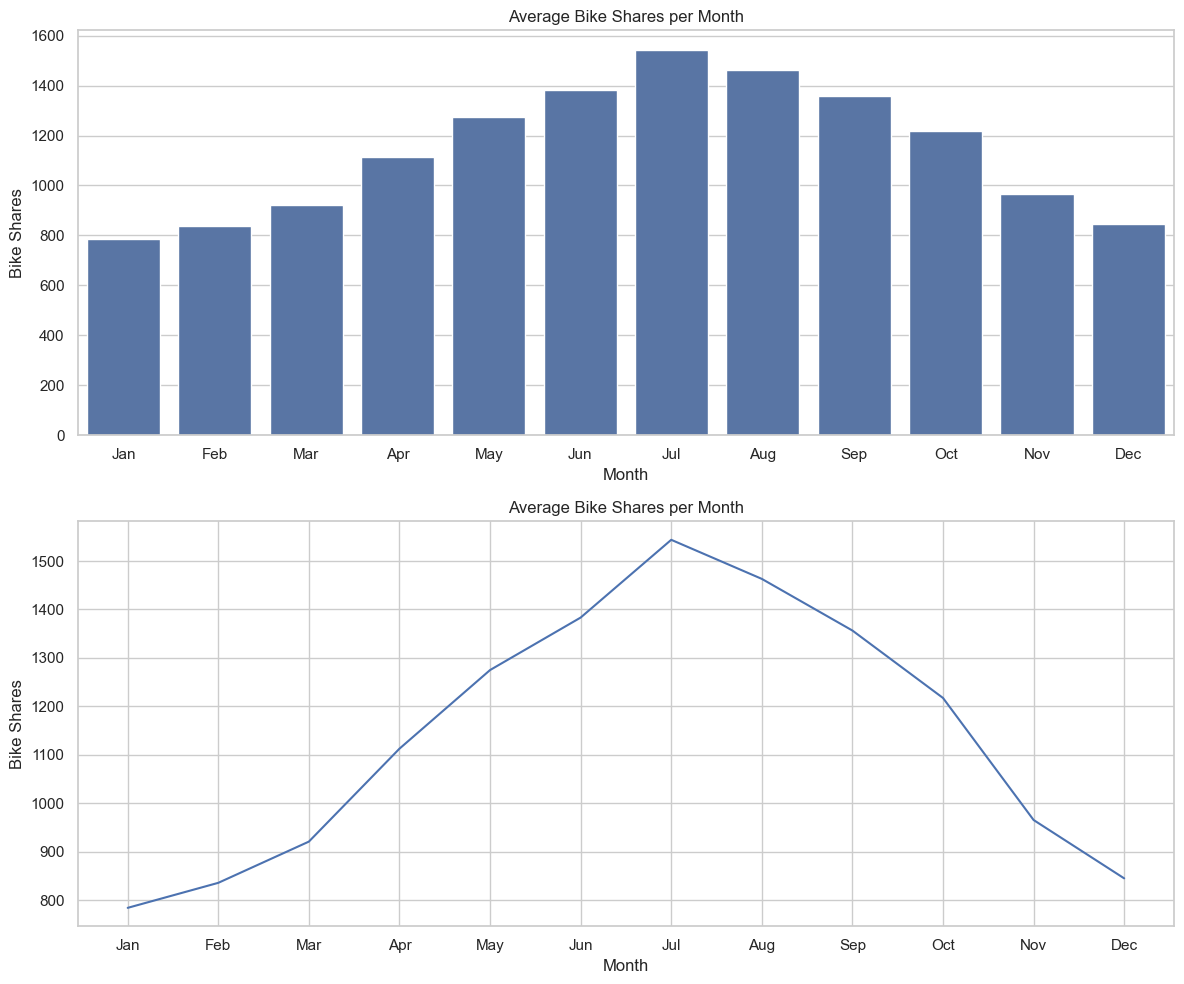

In [81]:
fig, axes = plt.subplots(2, 1, figsize=(12,10))

# 1)
sns.barplot(
    data=bikes,
    x='month',
    y='count',
    estimator='mean',
    errorbar=None,
    ax = axes[0]
)

# 2)
sns.lineplot(
    data=bikes,
    x='month',
    y='count',
    estimator='mean',
    errorbar=None,
    ax = axes[1]
)

month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for ax in axes:
    axes[1].set_xticks(range(1, 13))
    ax.set_title("Average Bike Shares per Month")
    ax.set_xticklabels(month_labels)
    ax.set_xlabel("Month")
    ax.set_ylabel("Bike Shares")

plt.tight_layout()
plt.show()

### Bike Shares per Day of Month

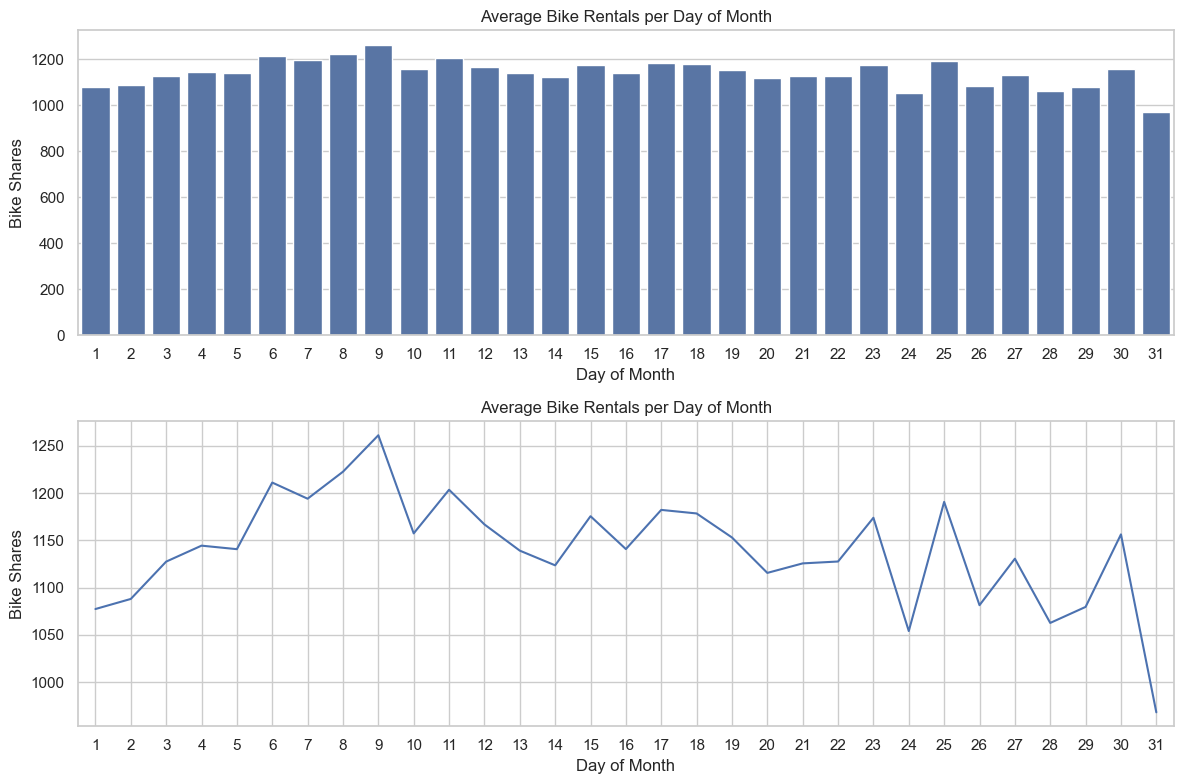

In [82]:
fig, axes = plt.subplots(2, 1, figsize=(12,8))

sns.barplot(
    data=bikes,
    x='day',
    y='count',
    errorbar=None,
    estimator='mean',
    ax=axes[0]
)
axes[0].set_title("Average Bike Rentals per Day of Month")
axes[0].set_ylabel("Bike Shares")
axes[0].set_xlabel("Day of Month")
axes[0].set_xlim(-0.5, 30.5)  # Set limits for bar plot
axes[0].set_xticks(range(31))  # Set tick positions
axes[0].set_xticklabels(range(1, 32))  # Label them 1-31

sns.lineplot(
    data=bikes,
    x='day',
    y='count',
    errorbar=None,
    estimator='mean',
    ax=axes[1]
)
axes[1].set_title("Average Bike Rentals per Day of Month")
axes[1].set_ylabel("Bike Shares")
axes[1].set_xlabel("Day of Month")
axes[1].set_xlim(0.5, 31.5)       # Set limits for line plot
axes[1].set_xticks(range(1, 32))  # Set ticks at 1-31

plt.tight_layout()
plt.show()

### Bike Shares by Weekday

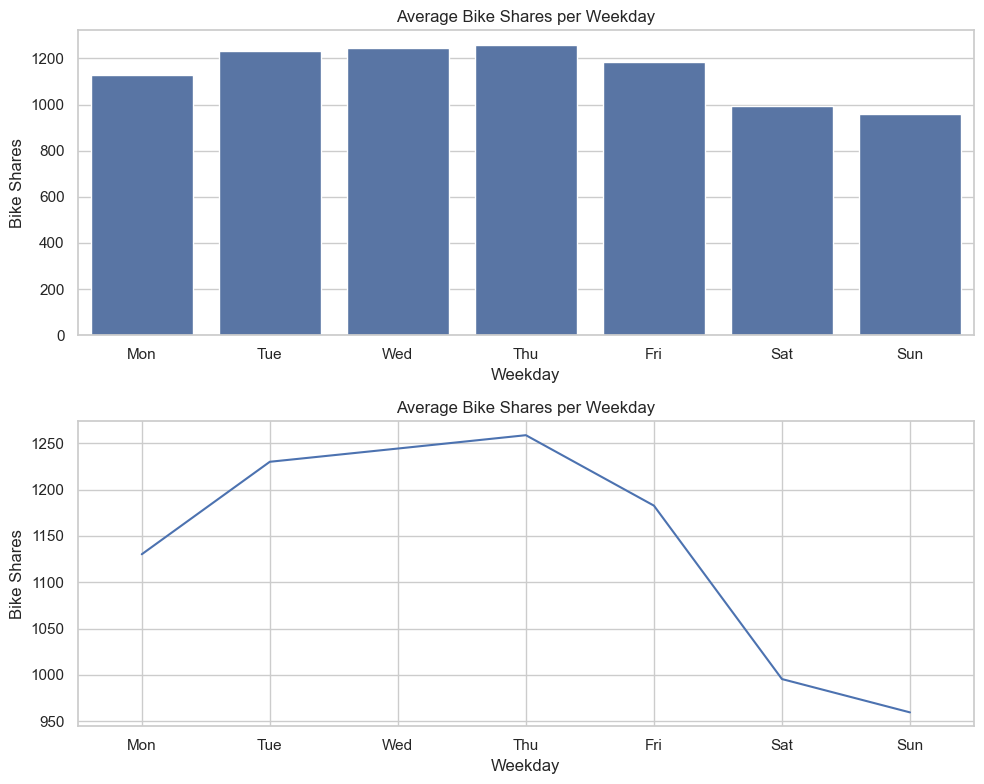

In [83]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))

sns.barplot(
    data=bikes,
    x='dayofweek',
    y='count',
    estimator='mean',
    errorbar=None,
    ax=axes[0]
)

weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
axes[0].set_xlim(-0.5, 6.5)  # Set limits for bar plot
axes[0].set_xticks(range(7))  # Set tick positions 0-6
axes[0].set_xticklabels(weekday_labels)
axes[0].set_title("Average Bike Shares per Weekday")
axes[0].set_xlabel("Weekday")
axes[0].set_ylabel("Bike Shares")

sns.lineplot(
    data=bikes,
    x='dayofweek',
    y='count',
    estimator='mean',
    errorbar=None,
    ax=axes[1]
)

axes[1].set_xlim(-0.5, 6.5)  # Set same limits for line plot
axes[1].set_xticks(range(7))  # Set tick positions 0-6
axes[1].set_xticklabels(weekday_labels)
axes[1].set_title("Average Bike Shares per Weekday")
axes[1].set_xlabel("Weekday")
axes[1].set_ylabel("Bike Shares")

plt.tight_layout()
plt.show()

### Bikes Hourly

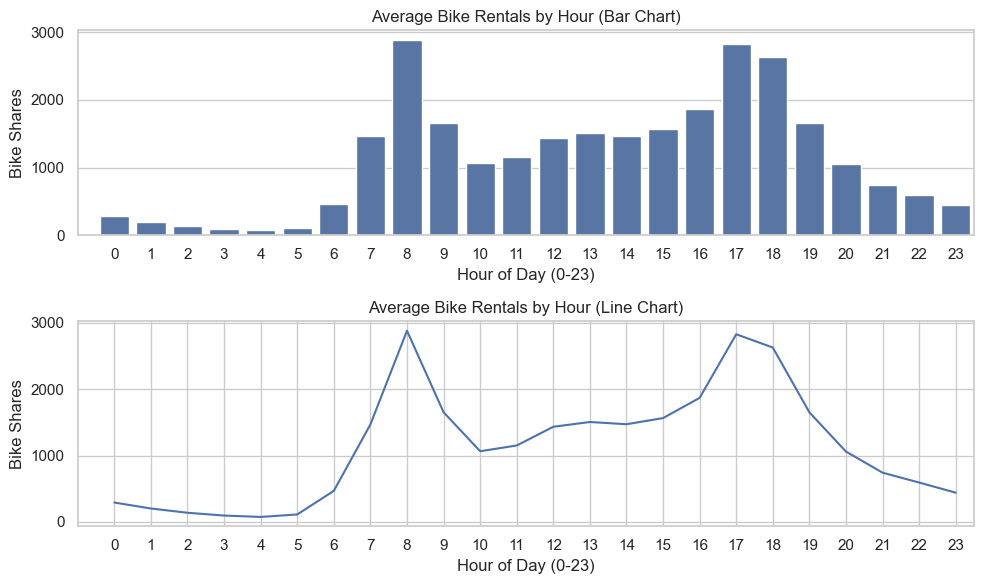

In [84]:
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

axes[0].set_title("Average Bike Rentals by Hour (Bar Chart)")

sns.barplot(
    data=bikes,
    x='hour',
    y='count',
    estimator='mean',
    errorbar=None,
    ax=axes[0]
)

axes[1].set_title("Average Bike Rentals by Hour (Line Chart)")

sns.lineplot(
    data=bikes,
    x='hour',
    y='count',
    estimator='mean',
    errorbar=None,
    ax=axes[1]
)

for ax in axes:
    ax.set_xlabel("Hour of Day (0-23)")
    ax.set_ylabel("Bike Shares")
    ax.set_xlim(-1, 23.5)
    ax.set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

## Bike Shares: Weekdays vs Weekends

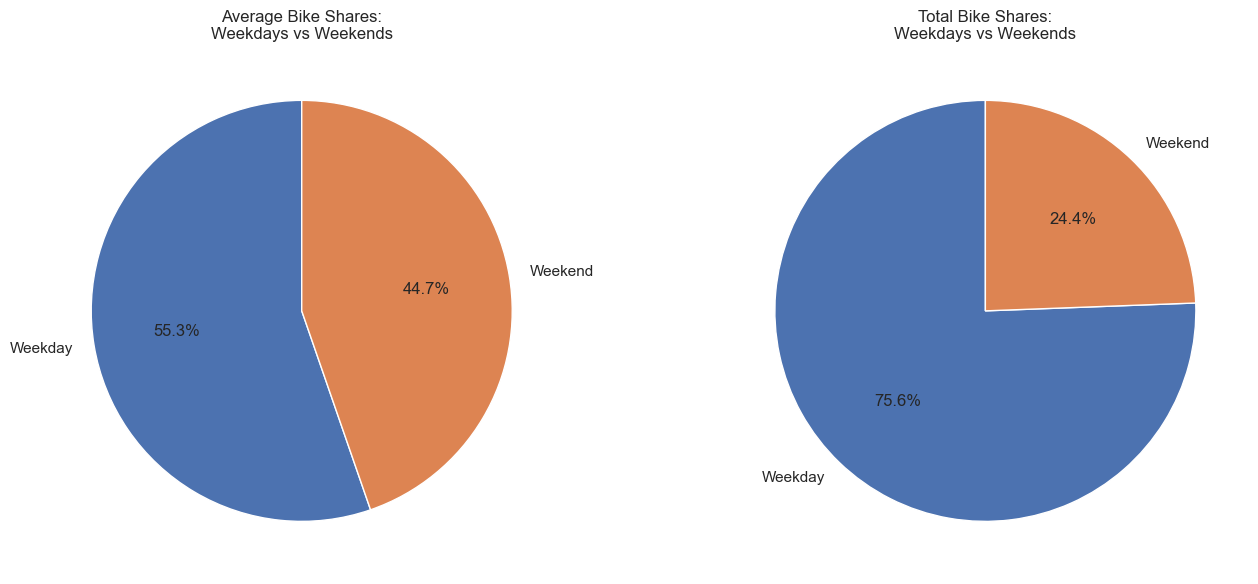

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Calculate average counts
avg_counts = bikes.groupby('is_weekend')['count'].mean()
weekday_avg = avg_counts[0]
weekend_avg = avg_counts[1]

# Calculate total counts
total_counts = bikes.groupby('is_weekend')['count'].sum()
weekday_total = total_counts[0]
weekend_total = total_counts[1]

# Pie chart 1: Average distribution
axes[0].pie(
    [weekday_avg, weekend_avg],
    labels=['Weekday', 'Weekend'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title("Average Bike Shares:\nWeekdays vs Weekends")

# Pie chart 2: Total distribution
axes[1].pie(
    [weekday_total, weekend_total],
    labels=['Weekday', 'Weekend'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Total Bike Shares:\nWeekdays vs Weekends")

plt.tight_layout()
plt.show()

## Bikes Non-Holidays vs Holidays

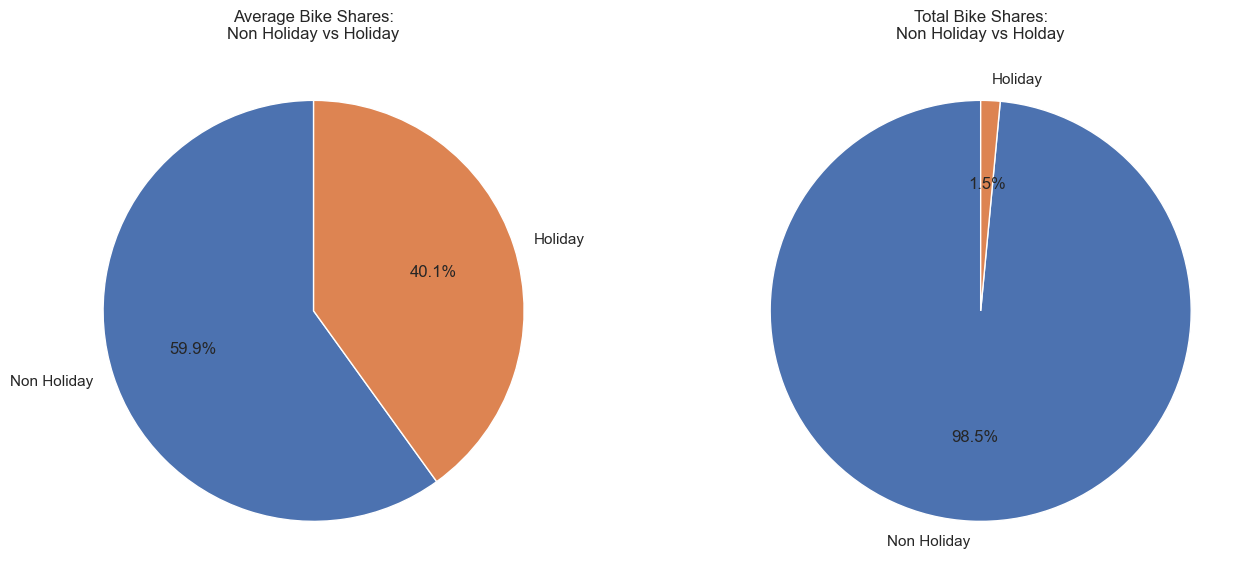

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Calculate average counts
avg_counts = bikes.groupby('is_holiday')['count'].mean()
weekday_avg = avg_counts[0]
weekend_avg = avg_counts[1]

# Calculate total counts
total_counts = bikes.groupby('is_holiday')['count'].sum()
weekday_total = total_counts[0]
weekend_total = total_counts[1]

# Pie chart 1: Average distribution
axes[0].pie(
    [weekday_avg, weekend_avg],
    labels=['Non Holiday', 'Holiday'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title("Average Bike Shares:\nNon Holiday vs Holiday")

# Pie chart 2: Total distribution
axes[1].pie(
    [weekday_total, weekend_total],
    labels=['Non Holiday', 'Holiday'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Total Bike Shares:\nNon Holiday vs Holday")

plt.tight_layout()
plt.show()

### Bikes Shares by Weather Category

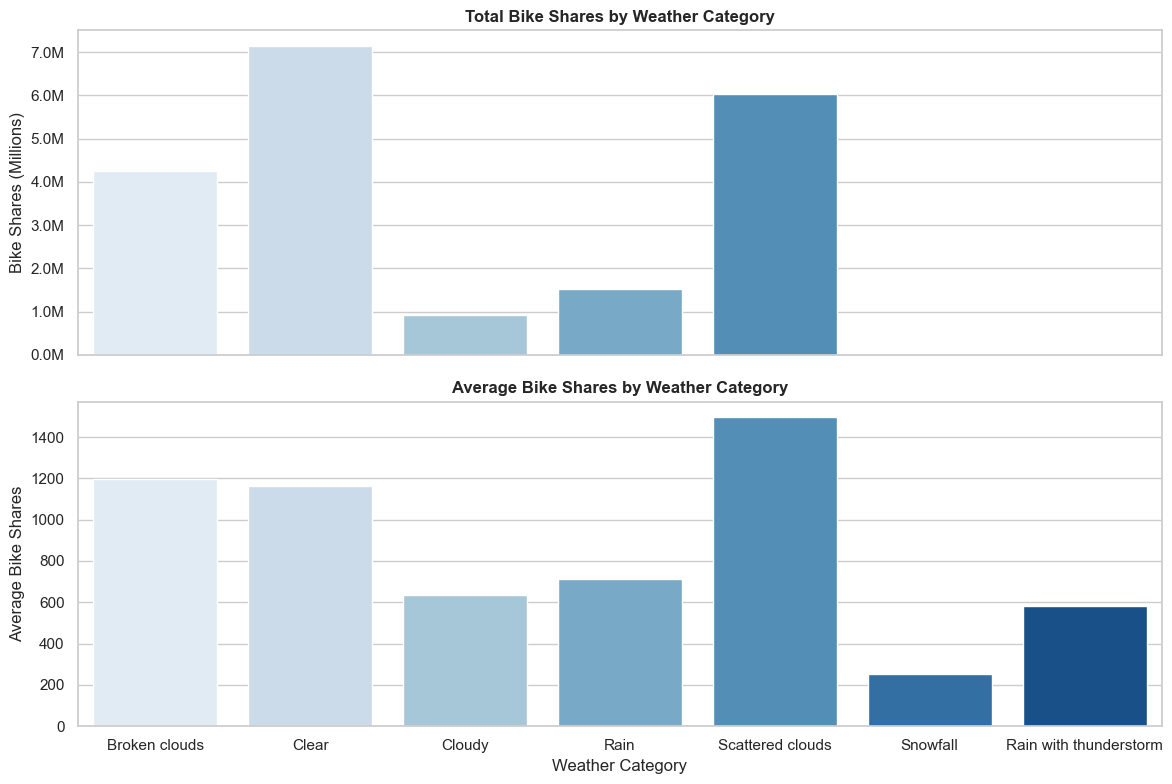

In [87]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1) Total Bike Shares per Weather Category
sns.barplot(
    data=bikes,
    x='weather',
    y='count',
    estimator='sum',
    hue='weather',
    palette="Blues",
    errorbar=None,
    ax=axes[0]
)

axes[0].set_title("Total Bike Shares by Weather Category", fontweight='bold')
axes[0].set_ylabel("Bike Shares (Millions)")
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# 2) Average Bike Shares per Weather Category
sns.barplot(
    data=bikes,
    x='weather',
    hue='weather',
    y='count',
    estimator='mean',
    palette="Blues",
    errorbar=None,
    ax=axes[1]
)

axes[1].set_title("Average Bike Shares by Weather Category", fontweight='bold')
axes[1].set_ylabel("Average Bike Shares")
axes[1].set_xlabel("Weather Category")

plt.tight_layout()
plt.show()

## Correlation between bike rentals and humidity, temperature, and wind speed.
For the following graphs, I use a binned scatterplot to show the relationships. This is because not all of the relationships are linear or smooth, scatterplots show the variability. Binned because the data size is very large, showing all inputs would make it harder to interpret the data visually. There are not clearly defined categories so using bar graphs wouldn't be ideal.

### Rentals vs Temperature

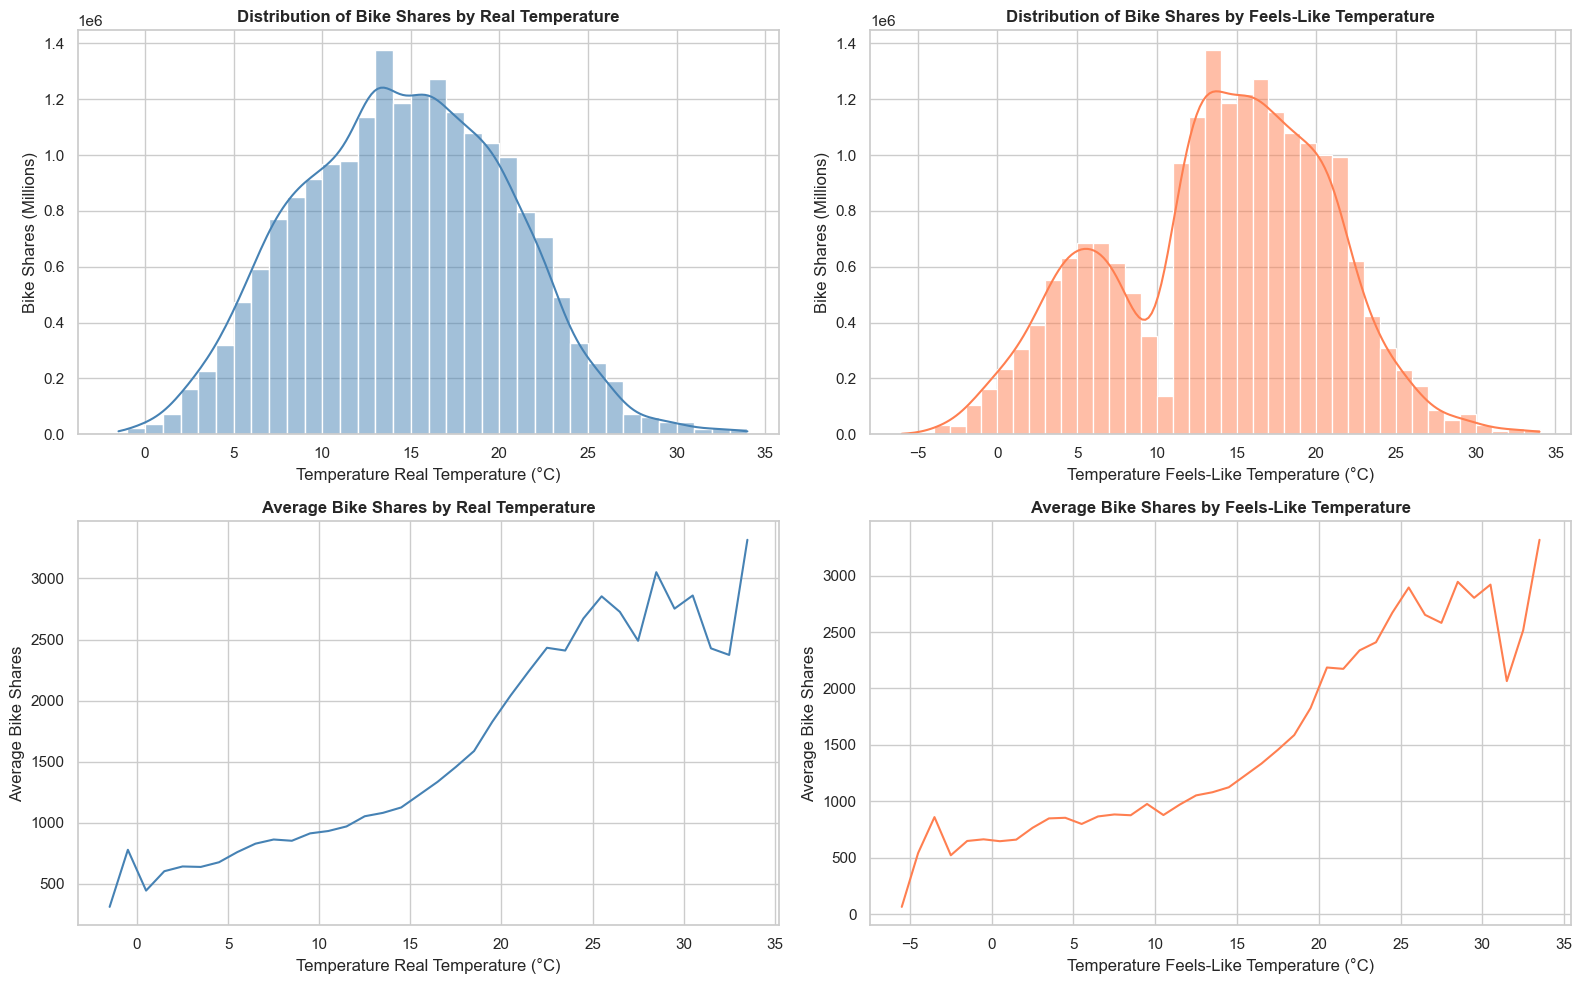

In [88]:
# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Define shared bin edges (1°C bins)
real_min = np.floor(bikes['temp_real_C'].min())
real_max = np.ceil(bikes['temp_real_C'].max())
feel_min = np.floor(bikes['temp_feels_like_C'].min())
feel_max = np.ceil(bikes['temp_feels_like_C'].max())

real_bins = np.arange(real_min, real_max + 1, 1)
feel_bins = np.arange(feel_min, feel_max + 1, 1)

# Store bin info for looping
cols = [
    ('temp_real_C', real_min, real_max, 'Real Temperature', 'steelblue'),
    ('temp_feels_like_C', feel_min, feel_max, 'Feels-Like Temperature', 'coral'),
]

for idx, (temp_col, tmin, tmax, label, color) in enumerate(cols):

    # Histogram (same binning logic)
    sns.histplot(
        x=temp_col,
        weights='count',
        data=bikes,
        binwidth=1,
        binrange=(tmin, tmax),
        kde=True,
        ax=axes[0, idx],
        color=color
    )
    
    axes[0, idx].set_title(f'Distribution of Bike Shares by {label}', fontweight='bold')
    axes[0, idx].set_xlabel(f'Temperature {label} (°C)')
    axes[0, idx].set_ylabel('Bike Shares (Millions)')

    # Lineplot: same bins via pd.cut
    bins = np.arange(tmin, tmax + 1, 1)
    bikes['temp_bin'] = pd.cut(bikes[temp_col], bins=bins, include_lowest=True)

    temp_avg = (
        bikes.groupby('temp_bin', observed=True)['count']
        .mean()
        .reset_index()
    )

    temp_avg['bin_center'] = temp_avg['temp_bin'].apply(lambda x: x.mid)

    sns.lineplot(
        data=temp_avg,
        x='bin_center',
        y='count',
        ax=axes[1, idx],
        color=color
    )
    axes[1, idx].set_xlabel(f'Temperature {label} (°C)')
    axes[1, idx].set_ylabel('Average Bike Shares')
    axes[1, idx].set_title(f'Average Bike Shares by {label}', fontweight='bold')

plt.tight_layout()
plt.show()


### Rentals vs Humidity

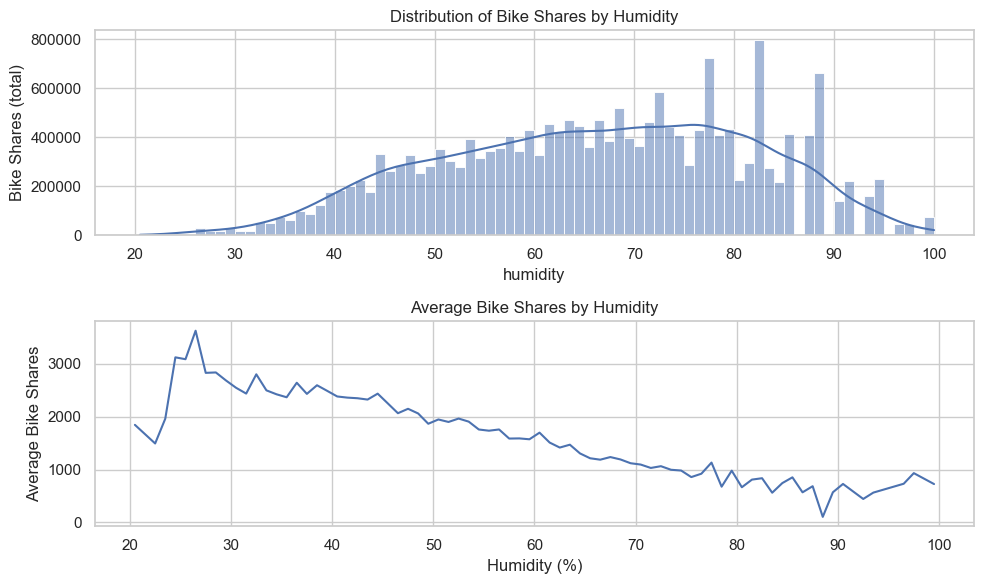

In [89]:
fig, axes = plt.subplots(2, 1, figsize=(10,6))

var = 'humidity'
hum_min = np.floor(bikes[var].min())
hum_max = np.ceil(bikes[var].max())          # use ceil for the upper edge

# Histogram (totals, since weights='count')
sns.histplot(
    data=bikes,
    x=var,
    weights='count',
    binwidth=1,
    binrange=(hum_min, hum_max),
    kde=True,
    ax=axes[0]
)

# Bin the humidity (use a specific column name)
bins = np.arange(hum_min, hum_max + 1, 1)
bikes['hum_bin'] = pd.cut(bikes[var], bins=bins, include_lowest=True)

# Compute MEAN counts per bin (consistent with temperature's "average")
hum_avg = (
    bikes.groupby('hum_bin', observed=True)['count']
    .mean()
    .reset_index()
)

# Bin centers
hum_avg['bin_center'] = hum_avg['hum_bin'].apply(lambda x: x.mid)

# Plot average on the lower axis (same style as temp)
sns.lineplot(
    data=hum_avg,
    x='bin_center',
    y='count',
    ax=axes[1]
)

axes[0].set_title('Distribution of Bike Shares by Humidity')
axes[0].set_ylabel('Bike Shares (total)')
axes[1].set_title('Average Bike Shares by Humidity')
axes[1].set_ylabel('Average Bike Shares')
axes[1].set_xlabel('Humidity (%)')

plt.tight_layout()
plt.show()

### Rentals vs Wind Speed

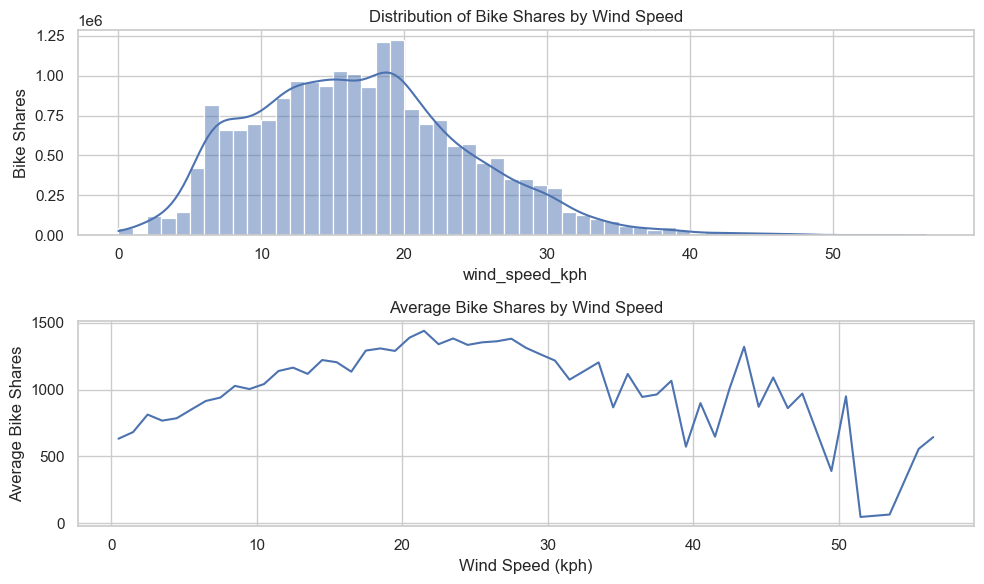

In [90]:
fig, axes = plt.subplots(2, 1, figsize=(10,6))

var = 'wind_speed_kph'
hum_min = np.floor(bikes[var].min())
hum_max = np.ceil(bikes[var].max())          # use ceil for the upper edge

# Histogram (totals, since weights='count')
sns.histplot(
    data=bikes,
    x=var,
    weights='count',
    binwidth=1,
    binrange=(hum_min, hum_max),
    kde=True,
    ax=axes[0]
)

# Bin the humidity (use a specific column name)
bins = np.arange(hum_min, hum_max + 1, 1)
bikes['hum_bin'] = pd.cut(bikes[var], bins=bins, include_lowest=True)

# Compute MEAN counts per bin (consistent with temperature's "average")
hum_avg = (bikes.groupby('hum_bin', observed=True)['count'].mean().reset_index())

# Bin centers
hum_avg['bin_center'] = hum_avg['hum_bin'].apply(lambda x: x.mid)

# Plot average on the lower axis (same style as temp)
sns.lineplot(
    data=hum_avg,
    x='bin_center',
    y='count',
    ax=axes[1]
)

axes[0].set_title('Distribution of Bike Shares by Wind Speed')
axes[0].set_ylabel('Bike Shares')
axes[1].set_title('Average Bike Shares by Wind Speed')
axes[1].set_ylabel('Average Bike Shares')
axes[1].set_xlabel('Wind Speed (kph)')

plt.tight_layout()
plt.show()

In [91]:
import os
os.getcwd()

'c:\\Users\\m\\Github\\LondonBikeRidesRepo\\LondonBikeRides'

In [92]:
# Writing the final dataframe to an excel file to use in Tableau visualisations. 
bikes.to_excel('london_bikes_final.xlsx', sheet_name='Data')
print(os.path.abspath('london_bikes_final.xlsx'))

c:\Users\m\Github\LondonBikeRidesRepo\LondonBikeRides\london_bikes_final.xlsx
